In [1]:
from utils.Dataset import DatasetLoader
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loader = DatasetLoader('./dataset/train_PASCAL2007.tfrecord', './dataset/val_PASCAL2007.tfrecord', 448, 7, 20)
train_ds, val_ds = loader.get_dataset()

In [14]:
def label_parse(label, img):
    for x_cell in range(7):
        for y_cell in range(7):
            if label[x_cell][y_cell][4] != 0:
                box_info = label[x_cell][y_cell][:4]
                name = np.argmax(label[x_cell][y_cell][5:])
                center_x = (box_info[0] * 64) + (x_cell * 64)
                center_y = (box_info[1] * 64) + (y_cell * 64)
                
                w = box_info[2] * 448
                h = box_info[3] * 448
                
                c1 = (int(center_x - (w / 2)), int(center_y - (h / 2)))
                c2 = (int(center_x + (w / 2)), int(center_y + (h / 2)))
                
                img = cv2.rectangle(img, c1, c2, (255, 0, 0), 1)
    return img

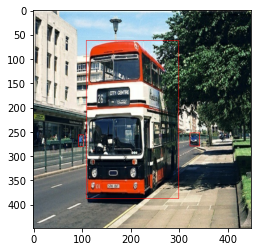

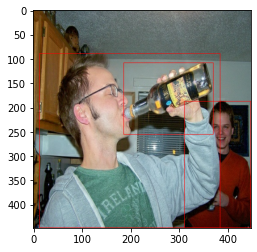

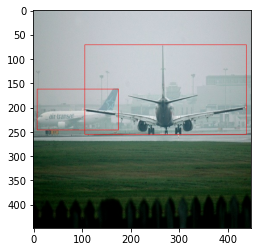

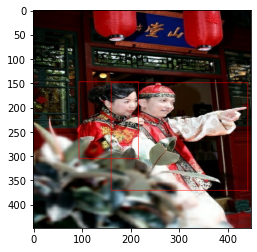

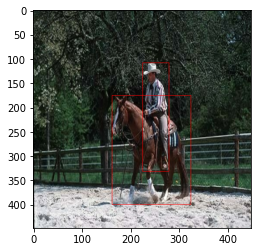

In [12]:
for i in train_ds.take(5):
    image = i[0].numpy().astype(np.uint8)
    label = i[1].numpy()
    
    image = label_parse(label, image)
    plt.imshow(image)
    plt.show()

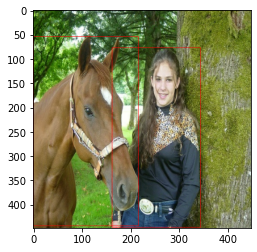

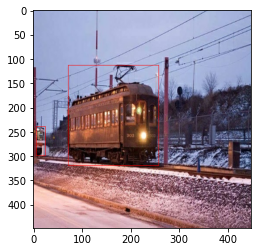

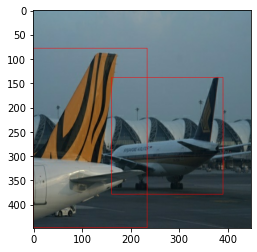

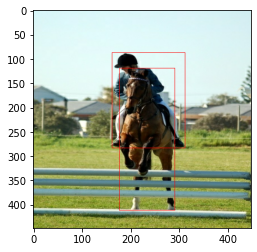

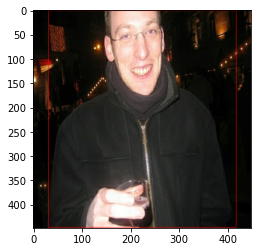

In [13]:
for i in val_ds.take(5):
    image = i[0].numpy().astype(np.uint8)
    label = i[1].numpy()
    
    image = label_parse(label, image)
    plt.imshow(image)
    plt.show()